In [61]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler

In [62]:
df = pd.read_csv('New_WineQT.csv')
# df

In [63]:
y = df['quality']
X = df.drop(['quality', 'Unnamed: 0'],  axis = 1)

In [64]:
# bestfeatures = SelectKBest(score_func = chi2, k = 'all')
# fit = bestfeatures.fit(X, y)

In [65]:
# dfscores = pd.DataFrame(fit.scores_)
# dfcolumns = pd.DataFrame(X.columns)

In [66]:
# featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
# featureScores.columns = ['Specs', 'Score']
# print(featureScores.nlargest(5, 'Score'))

**Стандартизация**

In [67]:
#features = featureScores.nlargest(13, 'Score')
#features['Specs'][5:]
features = ['residual sugar', 'fixed acidity', 'sulphates', 'chlorides', 'pH', "density"]

In [77]:
x_standart = df.loc[:, features].values

In [78]:
x_standart = df.loc[:].values

In [80]:
x_standart = StandardScaler().fit_transform(x_standart)
pd.DataFrame(data = x_standart, columns = df.columns.values).head(877)


Unnamed: 0  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     -1.739043      -0.482855          0.898859    -1.381475       -0.494626   
1     -1.736005      -0.240772          1.899626    -1.381475        0.118872   
2     -1.732966      -0.240772          1.232448    -1.161303       -0.144056   
3     -1.729928       1.816935         -1.436266     1.700938       -0.494626   
4     -1.723851      -0.482855          0.676466    -1.381475       -0.582269   
..          ...            ...               ...          ...             ...   
872    1.715654      -1.693271          1.121251    -0.886087       -0.669912   
873    1.718692      -1.148584         -0.157507    -0.665915       -0.144056   
874    1.721730      -0.845980          0.454073    -0.941130       -0.494626   
875    1.724769      -1.209104          0.342877    -0.941130       -0.406984   
876    1.730846      -1.390667          0.593069    -0.720958       -0.406984   

     chlorides  free sulfur dioxide  total sulfur dioxide   density        pH  \
0    -0.231823            -0.446779             -0.349311  0.628301  1.248292   
1     0.596933             1.189235              0.739361  0.084014 -0.818158   
2     0.370909             0.020653              0.310490  0.192871 -0.418200   
3    -0.269494             0.254370              0.508431  0.737159 -1.084797   
4    -0.269494            -0.213063             -0.151371  0.628301  1.248292   
..         ...                  ...                   ...       ...       ...   
872   0.257896             0.137512             -0.613232 -1.429105  2.314847   
873  -0.231823             1.656668             -0.151371 -0.492931  0.648355   
874  -0.533189             1.539810             -0.217351 -0.073829  0.648355   
875   0.295567             2.007243             -0.019410 -0.950132  0.848334   
876  -0.269494             2.007243             -0.019410 -0.639888  1.648250   

     sulphates   alcohol   quality  
0    -0.635671 -0.994052 -0.807165  
1     0.489422 -0.611397 -0.807165  
2     0.208149 -0.611397 -0.807165  
3    -0.448156 -0.611397  0.484593  
4    -0.635671 -0.994052 -0.807165  
..         ...       ...       ...  
872  -0.635671  1.110550  0.484593  
873   1.145727  0.536567  0.484593  
874   1.802031 -0.898388  0.484593  
875  -0.448156  0.058249 -0.807165  
876   0.770695 -0.228742 -0.807165  

[877 rows x 13 columns]

**Метод главных компонент (PCA)**

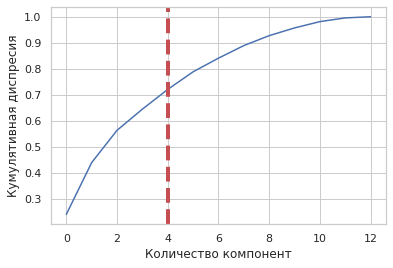

None

Cumulative Variance Ratio  Explained Variance Ratio
0                    0.240557                  0.240557
1                    0.439656                  0.199099
2                    0.563608                  0.123952
3                    0.644965                  0.081357
4                    0.720812                  0.075847
5                    0.788519                  0.067707
6                    0.840840                  0.052322
7                    0.889216                  0.048376
8                    0.927377                  0.038161
9                    0.957058                  0.029680
10                   0.981299                  0.024241
11                   0.995555                  0.014256
12                   1.000000                  0.004445

In [81]:
pca_test = PCA(n_components=13)
pca_test.fit(x_standart)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('Количество компонент')
plt.ylabel('Кумулятивная диспресия')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=4, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(13))

In [83]:
pca = PCA(n_components = 8)

principalComponents = pca.fit_transform(x_standart)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8'])

principalDf.head(877)

pc1       pc2       pc3       pc4       pc5       pc6       pc7  \
0   -0.981195 -1.982625 -1.281389  0.489540  0.824977 -1.673924 -0.136398   
1   -0.159450 -2.451453  0.418282  0.728613  1.001717 -0.446770  0.605762   
2   -0.104420 -1.895778 -0.500053  0.461802  0.915160 -0.844356  0.453749   
3    2.994615  0.056129  0.680984 -1.299062  0.151515 -1.366427  0.849872   
4   -0.974035 -1.983377 -0.957678  0.348829  0.875400 -1.691257 -0.155147   
..        ...       ...       ...       ...       ...       ...       ...   
872 -3.750177  0.794948 -0.379154  0.475705  0.213652  1.115765  0.047933   
873 -1.751643  1.059240  1.463201  0.274332  0.323321  1.043043 -1.195785   
874 -1.447146  0.313172  1.100653  0.085644  0.817981  0.685495 -2.222056   
875 -2.501348 -0.596679  1.153351 -0.428472 -0.034145  1.561206 -0.623393   
876 -2.620514 -0.349985  1.398753  0.106378  0.440768  0.998530 -1.804080   

          pc8  
0    0.191584  
1   -1.410777  
2   -0.637324  
3    0.408934  
4    0.265642  
..        ...  
872 -0.177283  
873 -0.463953  
874 -1.073993  
875  0.057090  
876 -0.149138  

[877 rows x 8 columns]

Множественная линейная регрессия

In [84]:
X_train, X_test, y_train, y_test = train_test_split(principalDf, y, test_size = 0.2, random_state=9)
lin_reg_mod = LinearRegression()
lin_reg_mod.fit(X_train, y_train)
LinearRegression()
pred = lin_reg_mod.predict(X_test)
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))

test_set_r2 = r2_score(y_test, pred)

print(test_set_rmse)
print(test_set_r2)

0.3554523546313006
0.7722471278068492


Множественная полиномиальная регрессия

In [142]:
X_train, X_test, y_train, y_test = train_test_split(principalDf, y, test_size = 0.2, random_state=9)

poly_reg = PolynomialFeatures(degree=1)

X_poly = poly_reg.fit_transform(X_train)

lin_reg_mod = LinearRegression()
lin_reg_mod.fit(X_poly, y_train)

LinearRegression()

X_poly_test = poly_reg.fit_transform(X_test)

pred_poly = lin_reg_mod.predict(X_poly_test)

pred_table = X_test

test_set_r2 = r2_score(y_test, pred_poly)
print(test_set_r2)

0.772247127806849


**Анализ независимых компонент (ICA)**

In [140]:
ica = FastICA(n_components=8)
X_ica = ica.fit_transform(X)

In [124]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# polynomial regression model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Множественная линейная регрессия

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size = 0.2, random_state=9)
lin_reg_mod = LinearRegression()
lin_reg_mod.fit(X_train, y_train)
LinearRegression()
pred = lin_reg_mod.predict(X_test)
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))

test_set_r2 = r2_score(y_test, pred)

print(test_set_rmse)

print("R2 ", test_set_r2)

0.572891943523846
R2  0.4083750219218164


Множественная полиномиальная регрессия

In [126]:
poly_reg = PolynomialFeatures(degree=3)

X_poly = poly_reg.fit_transform(X_ica) 

lin_reg_mod = LinearRegression()

lin_reg_mod.fit(X_poly, y)
LinearRegression()

pred_poly = lin_reg_mod.predict(X_poly)

test_set_r2 = r2_score(y, pred_poly)
print(test_set_r2)

0.5453811226766656


In [141]:
X_train, X_test, y_train, y_test = train_test_split(X_ica, y, test_size = 0.2, random_state=9)

poly_reg = PolynomialFeatures(degree=1)

X_poly = poly_reg.fit_transform(X_train)

lin_reg_mod = LinearRegression()
lin_reg_mod.fit(X_poly, y_train)

LinearRegression()

X_poly_test = poly_reg.fit_transform(X_test)

pred_poly = lin_reg_mod.predict(X_poly_test)

pred_table = X_test

test_set_r2 = r2_score(y_test, pred_poly)
print(test_set_r2)

0.4083750219218166
